In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [218]:
df = pd.read_csv('Car details v3.csv')

In [219]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [220]:
df.seller_type.unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [221]:
CompanyName = df['name'].apply(lambda x : x.split(' ')[0])
df.insert(1,"CompanyName",CompanyName)
df.drop('name',axis=1,inplace=True)
df.head()

Owner = df['owner'].apply(lambda x : x.split(' ')[0])
df.insert(8,"Owner",Owner)
df.drop('owner',axis=1,inplace=True)
df.head()

from datetime import date
current_date = date.today()
current_year = current_date.year

In [222]:
df.head()

,CompanyName,year,selling_price,km_driven,fuel,seller_type,transmission,Owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [223]:
from datetime import date
current_date = date.today()
current_year = current_date.year
for i in range(len(df['year'])):
    df['year'][i] = current_year - df['year'][i]

<ipython-input-223-32ea10a70558>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'][i] = current_year - df['year'][i]


In [224]:
df.insert(3,'cost_price',"")
for i in range(len(df['year'])):
    if df['year'][i]<=2:
        df['cost_price'][i] = int(df['selling_price'][i] *1.25)
    if 2<df['year'][i]<=4:
        df['cost_price'][i] = int(df['selling_price'][i] *1.66)
    if 4<df['year'][i]<=6:
         df['cost_price'][i] = int(df['selling_price'][i] *2)
    if df['year'][i]>6:
        df['cost_price'][i] = int(df['selling_price'][i] *2.5)


<ipython-input-224-f896555a9bcd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cost_price'][i] = int(df['selling_price'][i] *2.5)
<ipython-input-224-f896555a9bcd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cost_price'][i] = int(df['selling_price'][i] *1.66)
<ipython-input-224-f896555a9bcd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cost_price'][i] = int(df['selling_price'][i] *2)
<ipython-input-224-f896555a9

<Figure size 720x576 with 0 Axes>

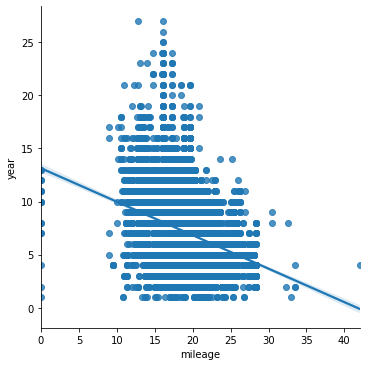

In [225]:
plt.figure(figsize=(10,8))
sns.lmplot(x='mileage',y='year',data=df)

<AxesSubplot:xlabel='CompanyName'>

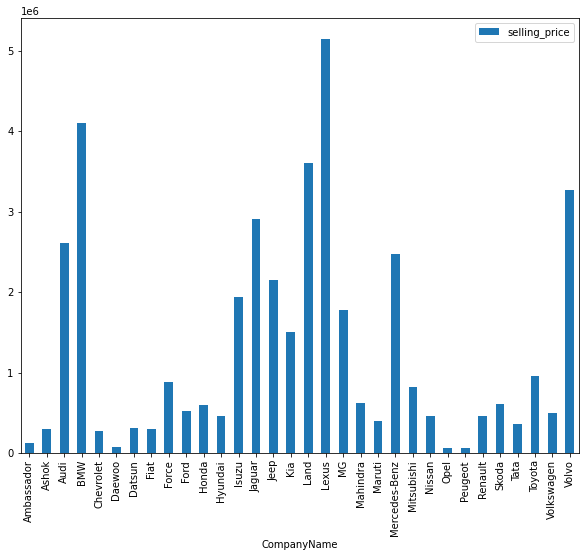

In [226]:
 pd.DataFrame(df.groupby(['CompanyName'])['selling_price'].mean()).plot(kind='bar',figsize=(10,8))

<AxesSubplot:xlabel='year'>

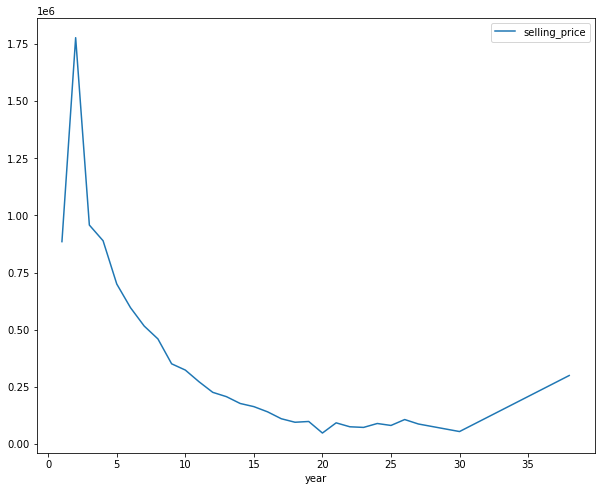

In [227]:
 pd.DataFrame(df.groupby(['year'])['selling_price'].mean()).plot(kind='line',figsize=(10,8))

If the car is produced more recently the its price is also more

<AxesSubplot:xlabel='km_driven'>

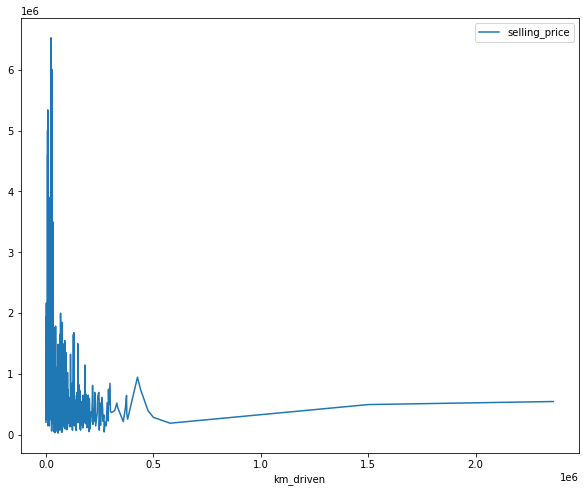

In [228]:
 pd.DataFrame(df.groupby(['km_driven'])['selling_price'].mean()).plot(kind='line',figsize=(10,8))

as number of km driven increases selling price decreases

Text(0.5, 1.0, 'transmission vs selling price')

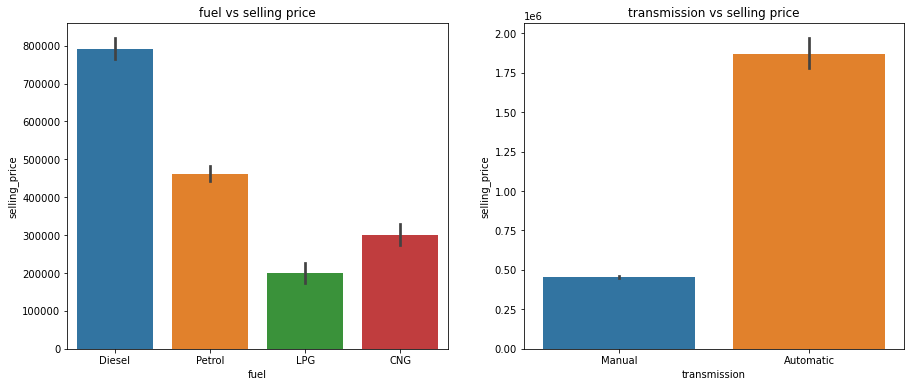

In [229]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.barplot(x=df['fuel'],y=df['selling_price'])
plt.title('fuel vs selling price')

plt.subplot(1,2,2)
sns.barplot(x=df['transmission'],y=df['selling_price'])
plt.title('transmission vs selling price')

> diesel power cars tent to have high selling price

> Similarly automatic cars have higher selling price

Text(0.5, 1.0, 'owner vs selling price')

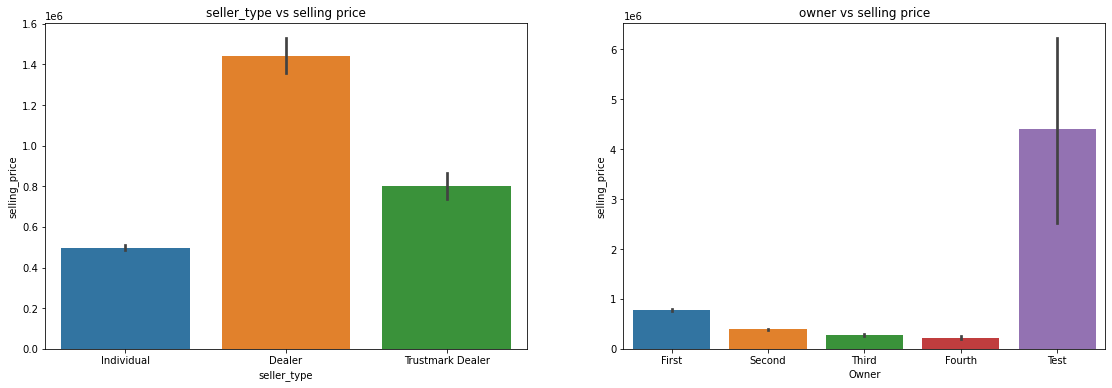

In [230]:
plt.figure(figsize=(19,6))

plt.subplot(1,2,1)
sns.barplot(x=df['seller_type'],y=df['selling_price'])
plt.title('seller_type vs selling price')

plt.subplot(1,2,2)
sns.barplot(x=df['Owner'],y=df['selling_price'])
plt.title('owner vs selling price')

> if you try to sell your car through a dealer selling price increases

>similaring test drive cars have a good seeling price

<AxesSubplot:xlabel='mileage', ylabel='engine'>

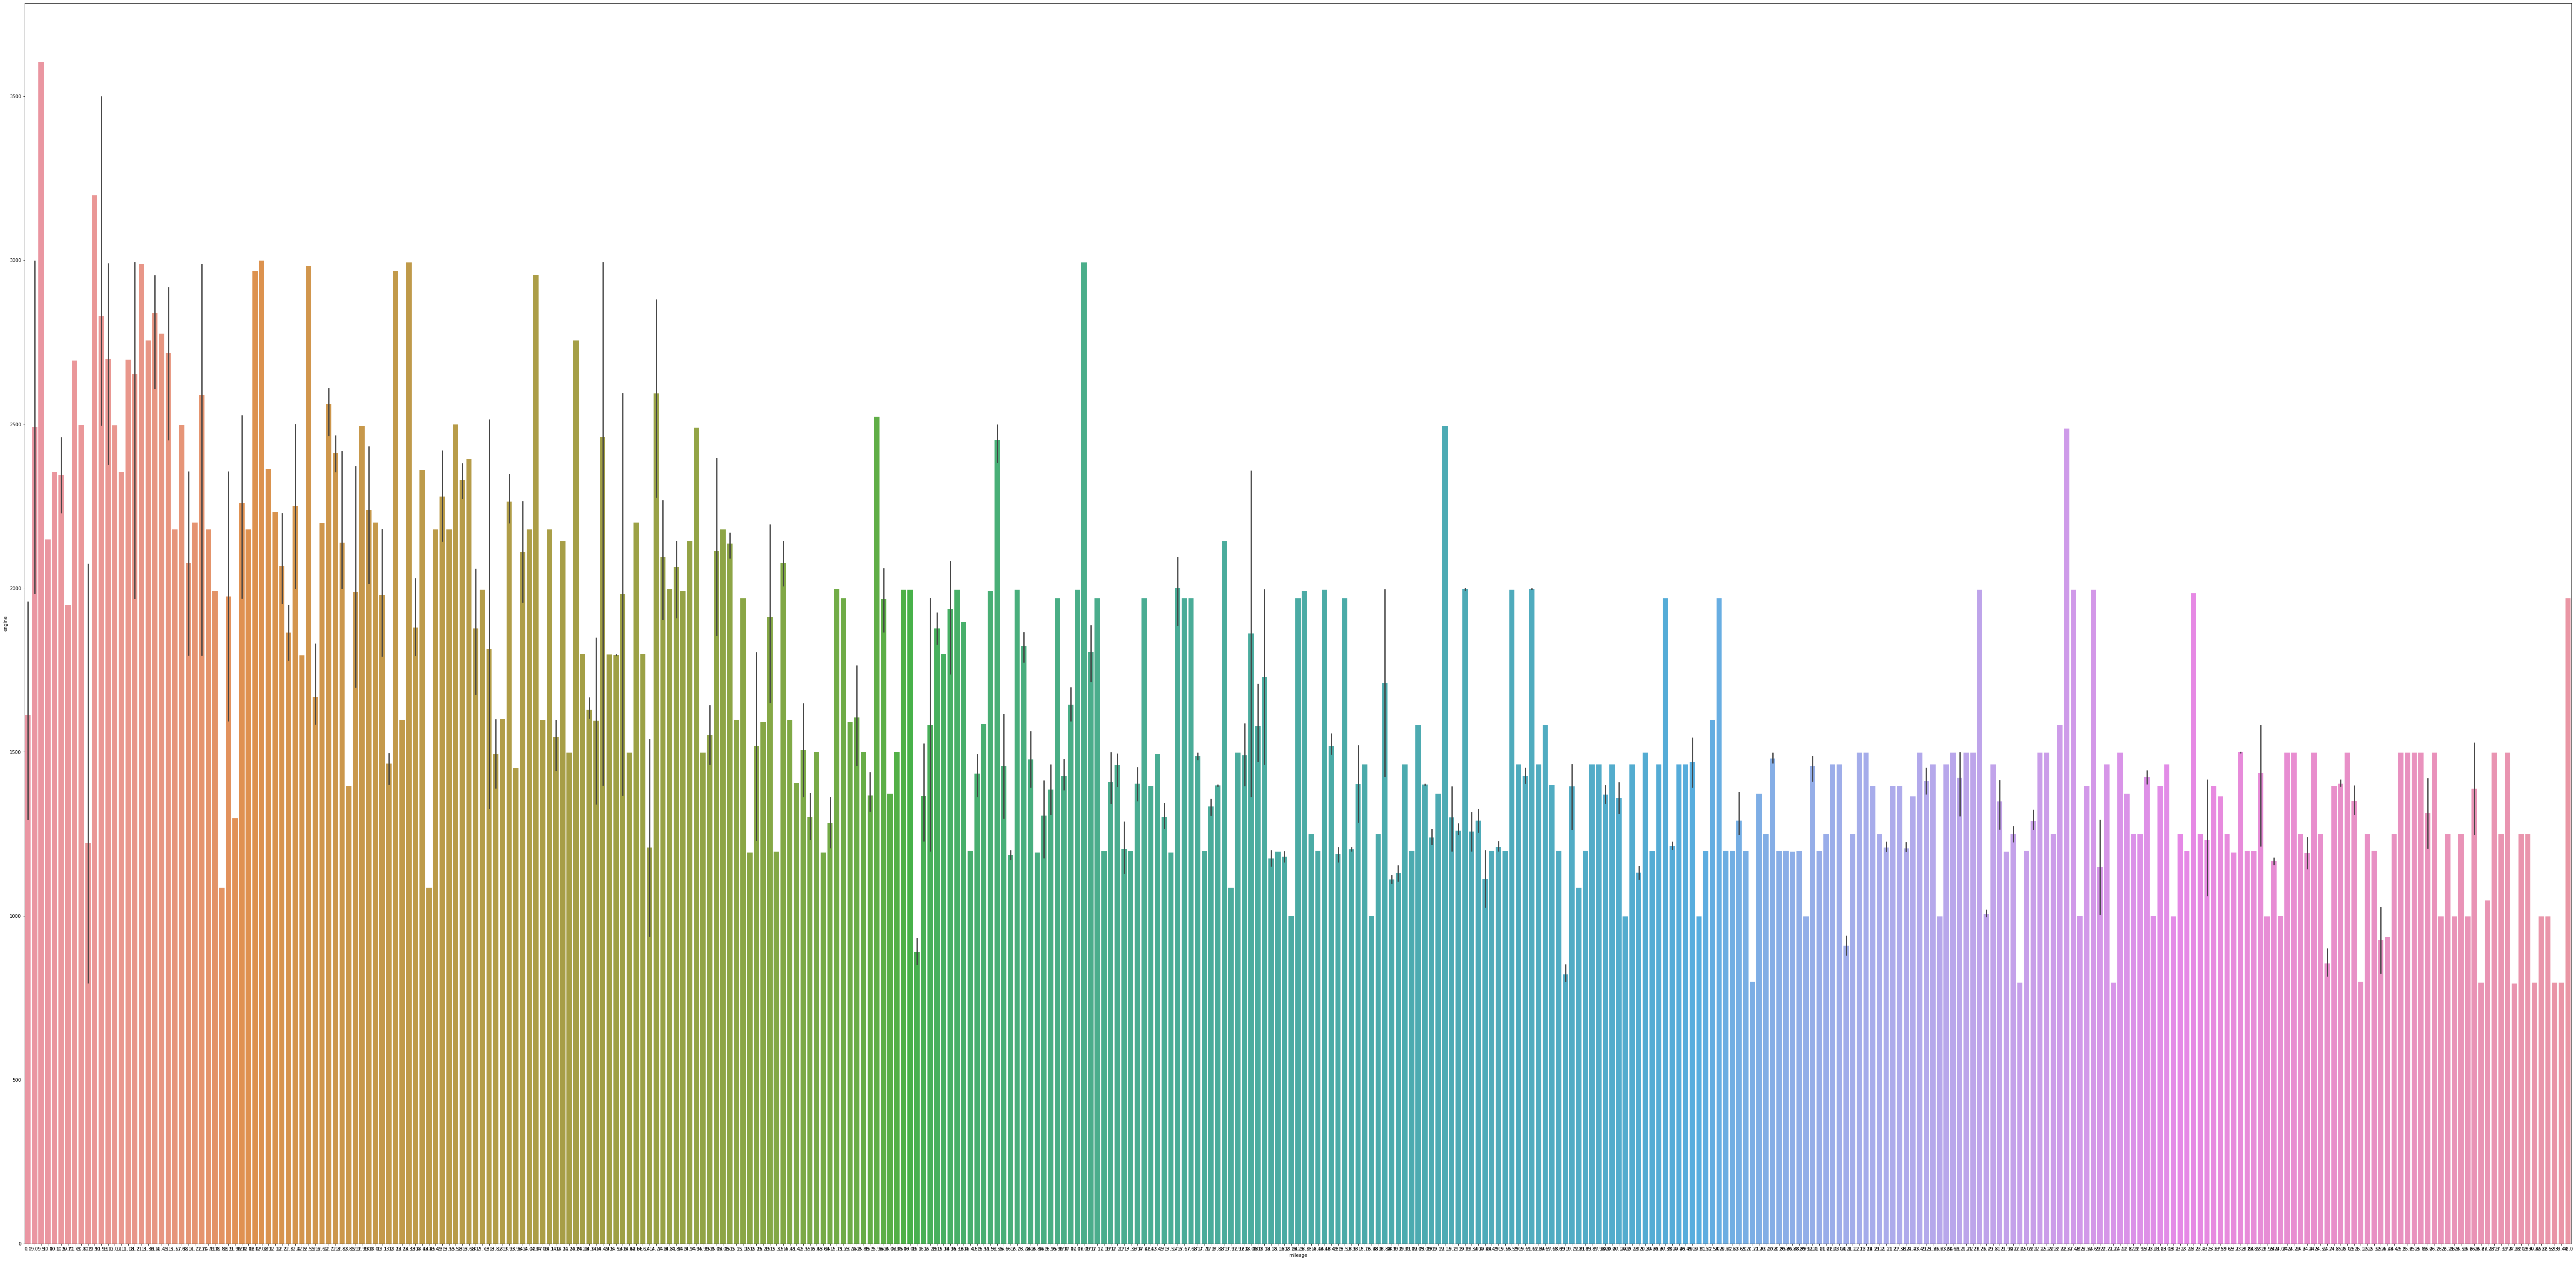

In [231]:
plt.figure(figsize=(100,50))
sns.barplot(x=df['mileage'],y=df['engine'])

if u zoom in and look carefully as the engine's CC increases mileage decreases

<AxesSubplot:xlabel='seats', ylabel='selling_price'>

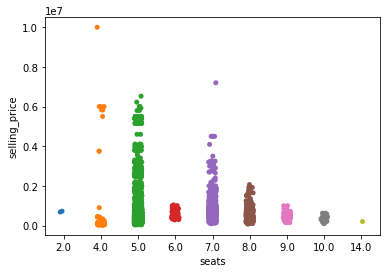

In [232]:
sns.stripplot(x=df['seats'],y=df['selling_price'])

# Data Cleaning

In [233]:
df.isna().sum()

CompanyName        0
year               0
selling_price      0
cost_price         0
km_driven          0
fuel               0
seller_type        0
transmission       0
Owner              0
mileage          221
engine           221
max_power        216
torque           222
seats            221
dtype: int64

In [234]:
df.shape

(8128, 14)

In [235]:
df.drop(['torque'],axis=1,inplace=True)

In [236]:
df.dropna(inplace=True)

In [237]:
df.isna().sum()

CompanyName      0
year             0
selling_price    0
cost_price       0
km_driven        0
fuel             0
seller_type      0
transmission     0
Owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [238]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['CompanyName'])
df['CompanyName'] = le.transform(df['CompanyName'])

le.fit(df['fuel'])
df['fuel'] = le.transform(df['fuel'])

le.fit(df['seller_type'])
df['seller_type'] = le.transform(df['seller_type'])

le.fit(df['transmission'])
df['transmission'] = le.transform(df['transmission'])

le.fit(df['Owner'])
df['Owner'] = le.transform(df['Owner'])

In [239]:
df.head()

,CompanyName,year,selling_price,cost_price,km_driven,fuel,seller_type,transmission,Owner,mileage,engine,max_power,seats
0,20,7,450000,1125000,145500,1,1,1,0,23.40,1248.0,74.00,5.0
1,26,7,370000,925000,120000,1,1,1,2,21.14,1498.0,103.52,5.0
2,10,15,158000,395000,140000,3,1,1,4,17.70,1497.0,78.00,5.0
3,11,11,225000,562500,127000,1,1,1,0,23.00,1396.0,90.00,5.0
4,20,14,130000,325000,120000,3,1,1,0,16.10,1298.0,88.20,5.0


# Model Building

In [240]:
x = df[['year','cost_price','km_driven','fuel','seller_type','transmission','Owner']]
y = df['selling_price']

In [241]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=101)

In [242]:
from sklearn.metrics import accuracy_score,confusion_matrix

from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=8)
kn.fit(x_train,y_train)
kn_predict = kn.predict(x_test)



In [243]:
accuracy_score(y_test,kn_predict)*100

55.438448566610454

1)Decision Tree

In [259]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_predict = dt.predict(x_test)


In [260]:
accuracy_score(y_test,dt_predict)*100

88.7858347386172

2) Random Forest 

In [261]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_predict = rf.predict(x_test)

In [262]:
accuracy_score(y_test,rf_predict)*100

56.492411467116355

3) support vector machine

In [263]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train,y_train)
svm_predict = svm.predict(x_test)

In [264]:
accuracy_score(y_test,svm_predict)*100

6.534569983136594

4) naive Bayes

In [265]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train,y_train)
nb_predict = nb.predict(x_test)

In [266]:
accuracy_score(y_test,nb_predict)*100

26.812816188870155

Looks like Decision tree has done a great job then others